<a href="https://colab.research.google.com/github/adithyarganesh/CSC591_004_Neural_Nets/blob/main/Final_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam

In [2]:
data = pd.read_csv("20.csv", header = None)

In [3]:
data.head()

,0,1,2,3,4,5
0,94.039,142.51,221.27,339.26,340.85,9503.0
1,107.660,170.76,199.92,310.61,332.60,10107.0
2,61.967,143.51,231.63,305.04,328.60,7506.3
3,86.851,107.66,216.18,333.62,320.53,8724.5
4,78.773,148.64,251.70,322.27,346.57,8713.1


In [4]:
data.corr()

,0,1,2,3,4,5
0,1.000000,0.014514,-0.006043,-0.017395,0.016438,0.951735
1,0.014514,1.000000,0.032741,-0.001900,-0.037500,0.046233
2,-0.006043,0.032741,1.000000,0.017146,0.031595,0.098727
3,-0.017395,-0.001900,0.017146,1.000000,-0.009506,0.111425
4,0.016438,-0.037500,0.031595,-0.009506,1.000000,0.179275
5,0.951735,0.046233,0.098727,0.111425,0.179275,1.000000


https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search

In [5]:
dataset = data.values
X = dataset[:,0:5]
Y = dataset[:,5]
X_test = X[-300:]
X = X[:-300]
Y_test = Y[-300:]
Y = Y[:-300]

In [6]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -8204048.46 (24315010.89) MSE


In [10]:
def custom_model( momentum=0, dropout_rate=0.0, learn_rate=0.01, epochs = 10, verbose=0):
  model = Sequential()
  model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1))
  adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mse'])
  return model

np.random.seed(5)

model = KerasRegressor(build_fn=custom_model, verbose=0)

# Hyperparameter tuning
learn_rate = [0.0001, 0.001, 0.01]
dropout_rate = [0.0, 0.2, 0.3]
batch_size = [10, 50, 100]
epochs = [10, 50, 100]

param_grid = dict(batch_size=batch_size, epochs=epochs, learn_rate=learn_rate, dropout_rate=dropout_rate)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)

In [11]:
print("Best mse is %f with params --> %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
std_dev = grid_result.cv_results_['std_test_score']
tuned_params = grid_result.cv_results_['params' ]
for mean, stdev, param in zip(means, std_dev, tuned_params):
  print("%f, %f ----> %r" % (mean, stdev, param))

Best mse is -24887.330078 with params --> {'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 100, 'learn_rate': 0.01}
-83463.160156, 25271.865298 ----> {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'learn_rate': 0.0001}
-88775.615625, 23038.250922 ----> {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'learn_rate': 0.001}
-90300.914844, 32942.413488 ----> {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'learn_rate': 0.01}
-36012.864453, 11941.555961 ----> {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 50, 'learn_rate': 0.0001}
-31121.520313, 7992.348638 ----> {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 50, 'learn_rate': 0.001}
-28983.807812, 5356.626577 ----> {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 50, 'learn_rate': 0.01}
-35069.562109, 8180.334911 ----> {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 100, 'learn_rate': 0.0001}
-33771.587500, 7284.982974 ----> {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 100, 'learn_rate': 0.001}
-32479.93828

In [16]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()

In [17]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     9585.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        01:55:01   Log-Likelihood:                -14158.
No. Observations:                2000   AIC:                         2.833e+04
Df Residuals:                    1994   BIC:                         2.836e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2567.9162    142.217    -18.056      0.0

In [18]:
reg2 = LinearRegression()
reg2.fit(X, Y)

print("The linear model is: Y = {:.5} + {:.5}*X1 + {:.5}*X2 + {:.5}*X3 + {:.5}*X4 + {:.5}*X5".format(reg2.intercept_, reg2.coef_[0], reg2.coef_[1], reg2.coef_[2], reg2.coef_[3], reg2.coef_[4]))
print("Y = a0 + a1X1 + a3X3 + a4X4 + a5X5")

The linear model is: Y = -2567.9 + 55.037*X1 + 2.2014*X2 + 5.6969*X3 + 6.9531*X4 + 9.1432*X5
Y = a0 + a1X1 + a3X3 + a4X4 + a5X5


In [19]:
LR_sse = 0
for v in Y - reg2.predict(X):
  LR_sse += v**2

In [20]:
NN_sse = 0
for v in Y - grid_result.predict(X):
  NN_sse += v**2

In [21]:
print("SSE for Multivariate regression: ", LR_sse)
print("SSE for estimation with Neural Moedl: ", NN_sse)

SSE for Multivariate regression:  164973673.90797538
SSE for estimation with Neural Moedl:  44258448.18429801


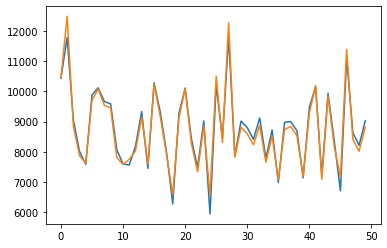

In [22]:
Y_test_pred = reg2.predict(X_test)
plt.plot(Y_test_pred[:50])
plt.plot(Y_test[:50])

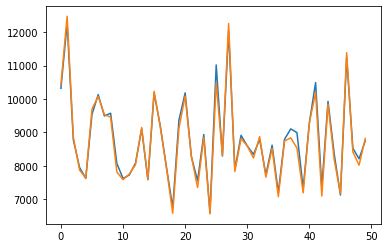

In [23]:
Y_test_pred_NN = grid_result.predict(X_test)
plt.plot(Y_test_pred_NN[:50])
plt.plot(Y_test[:50])